## Method, Assumption and Overview
 In this notebook, we went by the assumption that categorical features don't provide meaningful information to the decision tree model and can potentially lead to confusion and clutter as opposed to focus, attention to details, and accuracy.

In [26]:
# IMPORTING DEPENDENCIES
# ----------------------------------------------------------------
#NOTE: Analysis libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#NOTE: Importing model libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report # * Testing methods 
from sklearn.tree import plot_tree # * Tree plotting function
from sklearn.metrics import make_scorer, recall_score

# * This library will be used to optimise the parameters of the decision tree
from sklearn.model_selection import GridSearchCV

# * Pickling library
import pickle

In [27]:
# Randering encoded data
    # * File path (relative)
path = "/Users/galbeeir/Desktop/git/Project 4 - Fradulent Transactions/fraudulent_transactions/ML_and_dashboard/ML/Data/Fraud_Encoded.csv" 

    # * Loading the file - Pandas
fraud_df = pd.read_csv(path)
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,first,last,street,city,state,zip,...,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,gender_F,gender_M
0,0.723521,0.001959,0.002229,-0.421990,0.005452,0.004327,0.005452,0.005452,0.005655,-0.729275,...,0.675910,0.812151,0.006078,-0.320383,0.722319,-0.891684,0.656063,0,0,1
1,0.723522,0.002299,0.002229,-0.252575,0.005464,0.005318,0.004785,0.004785,0.003972,1.309015,...,-1.469910,-0.293019,0.004719,0.934113,0.722319,0.178534,-1.434080,0,1,0
2,0.723523,0.001214,0.001510,-0.180740,0.003895,0.005051,0.001918,0.001918,0.006113,-1.380235,...,1.214101,-0.179602,0.003762,-0.171555,0.722320,0.383272,1.165130,0,1,0
3,0.723524,0.004274,0.002819,-0.062878,0.008014,0.005318,0.004568,0.004568,0.005496,-0.596435,...,0.684376,-0.112365,0.013134,0.791421,0.722322,-1.905079,0.679149,0,0,1
4,0.723524,0.001665,0.002692,-0.419918,0.004822,0.005736,0.003761,0.003761,0.004542,0.030457,...,0.379028,-0.290286,0.006817,-1.050363,0.722322,1.257476,0.315647,0,0,1


In [28]:
# * printing the features
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  float64
 1   merchant               float64
 2   category               float64
 3   amt                    float64
 4   first                  float64
 5   last                   float64
 6   street                 float64
 7   city                   float64
 8   state                  float64
 9   zip                    float64
 10  lat                    float64
 11  long                   float64
 12  city_pop               float64
 13  job                    float64
 14  dob                    float64
 15  unix_time              float64
 16  merch_lat              float64
 17  merch_long             float64
 18  is_fraud               int64  
 19  gender_F               int64  
 20  gender_M               int64  
dtypes: float64(18), int64(3)
memory usage: 296.8 MB


As we can see, we can reduce our features further by removing the gender_M / gender_F columns as it is clear that 0 is male 1 will be female for example.

In [29]:
# Removing a gender & Categorical variables
fraud_df = fraud_df.drop(['gender_F', "merchant", "category", "first", "last", "street", "job", "city", "state"], axis=1).rename(columns={'gender_M': "gender"})
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  float64
 1   amt                    float64
 2   zip                    float64
 3   lat                    float64
 4   long                   float64
 5   city_pop               float64
 6   dob                    float64
 7   unix_time              float64
 8   merch_lat              float64
 9   merch_long             float64
 10  is_fraud               int64  
 11  gender                 int64  
dtypes: float64(10), int64(2)
memory usage: 169.6 MB


In [30]:
# Splitting the encoded data target and features variables
    # * Target Variable
y = fraud_df['is_fraud'].values.reshape(-1, 1)
    # * Features to evaluate against the target variable
X = fraud_df.drop('is_fraud', axis=1)

In [31]:
# Splitting the dataset into test and train datasets with random state of 2023
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

### Creating logistic regression model

In [32]:
# Instantiating the LogisticRegression model
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

# * Fitting the model
lr_model.fit(X_train, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [33]:
# Make a prediction using the testing data
lr_reg_predictions = lr_model.predict(X_test)

In [34]:
# Defining a function to create a confusion metrix visual
def confusionM_plot(metrix):
    # * Generating a confusion matrix heatmap
    sns.heatmap(metrix, cmap='coolwarm', fmt='d', annot=True, linewidth=1)

# Altering the heat map specifications
    # * Changing the x, y labels and adding a title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # * Changing the x, y ticks by adding a label
    plt.xticks(ticks=[0.5, 1.5], labels =['Non-Fradulent (0)', 'Fradulent (1)'])
    plt.yticks(ticks=[0.5, 1.5], labels =['Non-Fradulent (0)', 'Fradulent (1)'])

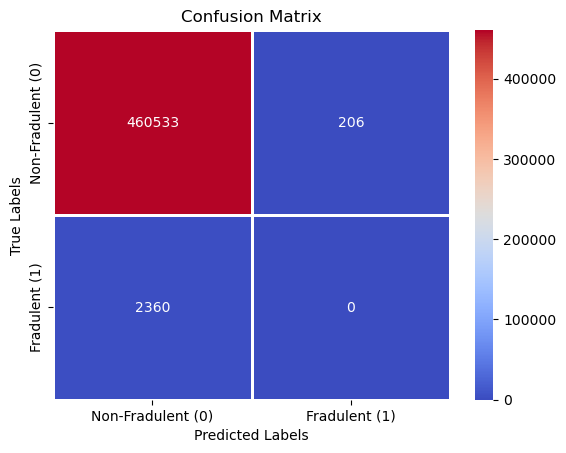

In [35]:
# Evaluating the model's performance with Classification report & Confusion Metrix
cf_metrix = confusion_matrix(y_test, lr_reg_predictions)

confusionM_plot(cf_metrix)

Going by the confusion metrix above, we can already see that the model performs poorly when it comes to recall, it can bealy identify fradulent transactions, let see the results in the classification report

In [36]:
print(classification_report(y_test, lr_reg_predictions, target_names=['Non-Fradulent', 'Fradulent']))

               precision    recall  f1-score   support

Non-Fradulent       0.99      1.00      1.00    460739
    Fradulent       0.00      0.00      0.00      2360

     accuracy                           0.99    463099
    macro avg       0.50      0.50      0.50    463099
 weighted avg       0.99      0.99      0.99    463099



Recall score of 0.1 confirms that the model can hardly identify fradulent transactions. In addition, a score of 0.58 can hardly be considered as high accuracy with precision as the precision metric indicates that the model predicts fradulent transactions and is correct only 0.58 of the times. 

---

### Decision Tree Model

In [37]:
# Let's first define a function to plot the evaluated the tree results every with different components to measure accuracy
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds, target_names=['Non-Fradulent', 'Fradulent']))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [38]:
# Instantiating the DecisionTree Model - Default Model (no modifications)
default_tree_model = DecisionTreeClassifier()

In [39]:
# Fitting the model
default_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Model predictions
default_pred = default_tree_model.predict(X_test)

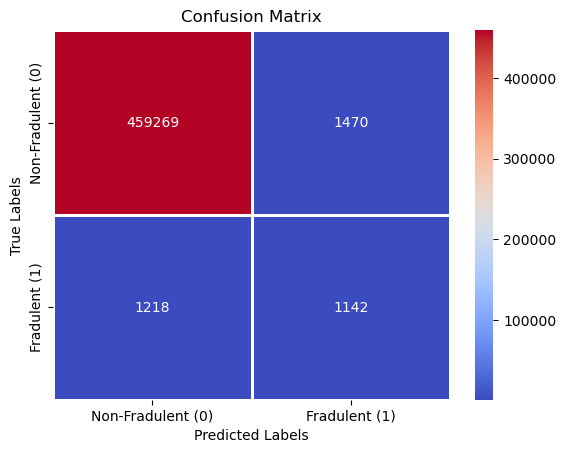

In [41]:
# Creating a confusion metrix instance 
cf_tree_default_metrix = confusion_matrix(y_test, default_pred)

    # * Plotting the confusion matrix
confusionM_plot(cf_tree_default_metrix)

At first glance we can already see an improvement in performance with identifying fradulent transactions.

               precision    recall  f1-score   support

Non-Fradulent       1.00      1.00      1.00    460739
    Fradulent       0.44      0.48      0.46      2360

     accuracy                           0.99    463099
    macro avg       0.72      0.74      0.73    463099
 weighted avg       0.99      0.99      0.99    463099





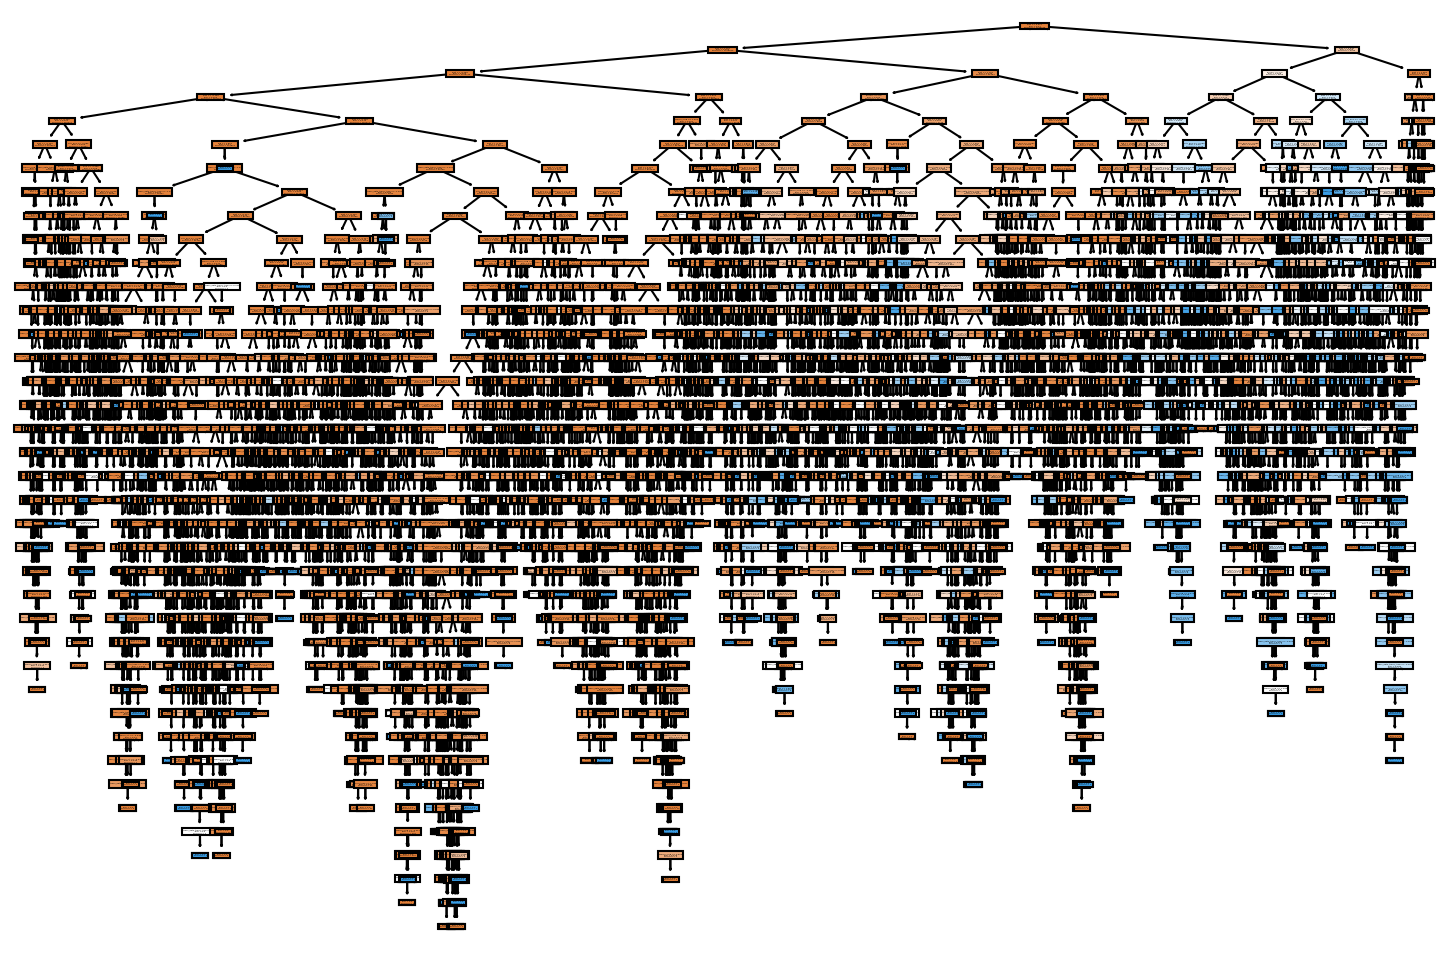

In [42]:
# Plotting the tree couple with the Classifcation report
report_model(default_tree_model)

In [43]:
# Creating a measure importance dataframe
default_feature_importance = pd.DataFrame(data = default_tree_model.feature_importances_, index=X.columns, columns=["Feature Importance"]).sort_values(by="Feature Importance",ascending=False)
default_feature_importance

,Feature Importance
amt,0.339767
dob,0.110576
unix_time,0.094414
merch_lat,0.094242
trans_date_trans_time,0.091086
merch_long,0.088639
city_pop,0.066407
lat,0.041252
zip,0.031208
long,0.027513


In [44]:
# Printing the model parameters
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [45]:
# Creating a model with the following specifications
    # * criterion => 'gini'
    # * splitter => 'log_loss'
    # * max_depth => 10 
    # * random_state => 72
    # * max_features => 10
spec_tree_model = DecisionTreeClassifier(
    criterion = 'log_loss',
    splitter = 'best',
    max_depth = 12, 
    random_state = 72,
    max_features = 10
)

In [46]:
# Fitting the model
spec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=12, max_features=10,
                       random_state=72)

In [47]:
# Spec predictions 
spec_pred = spec_tree_model.predict(X_test)

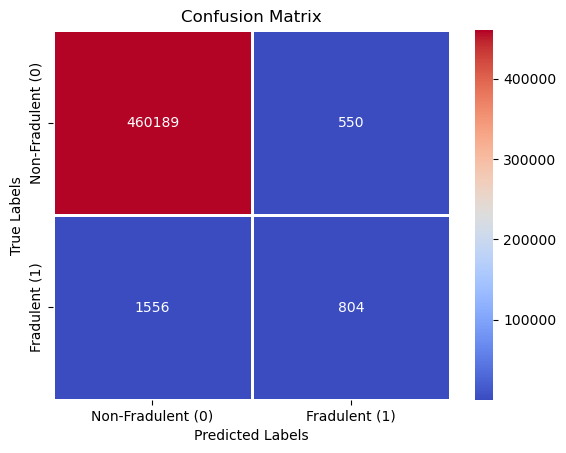

In [48]:
# Showing the confusion metrics scores
spec_cx = confusion_matrix(y_test, spec_pred)

# * Plotting the confusion scores
confusionM_plot(spec_cx)

As expected, sense, we've reduced the amount of leaves and branches in the model we are receiving a performance reduction, however, not substantial reduction in performance.

               precision    recall  f1-score   support

Non-Fradulent       1.00      1.00      1.00    460739
    Fradulent       0.59      0.34      0.43      2360

     accuracy                           1.00    463099
    macro avg       0.80      0.67      0.72    463099
 weighted avg       0.99      1.00      0.99    463099





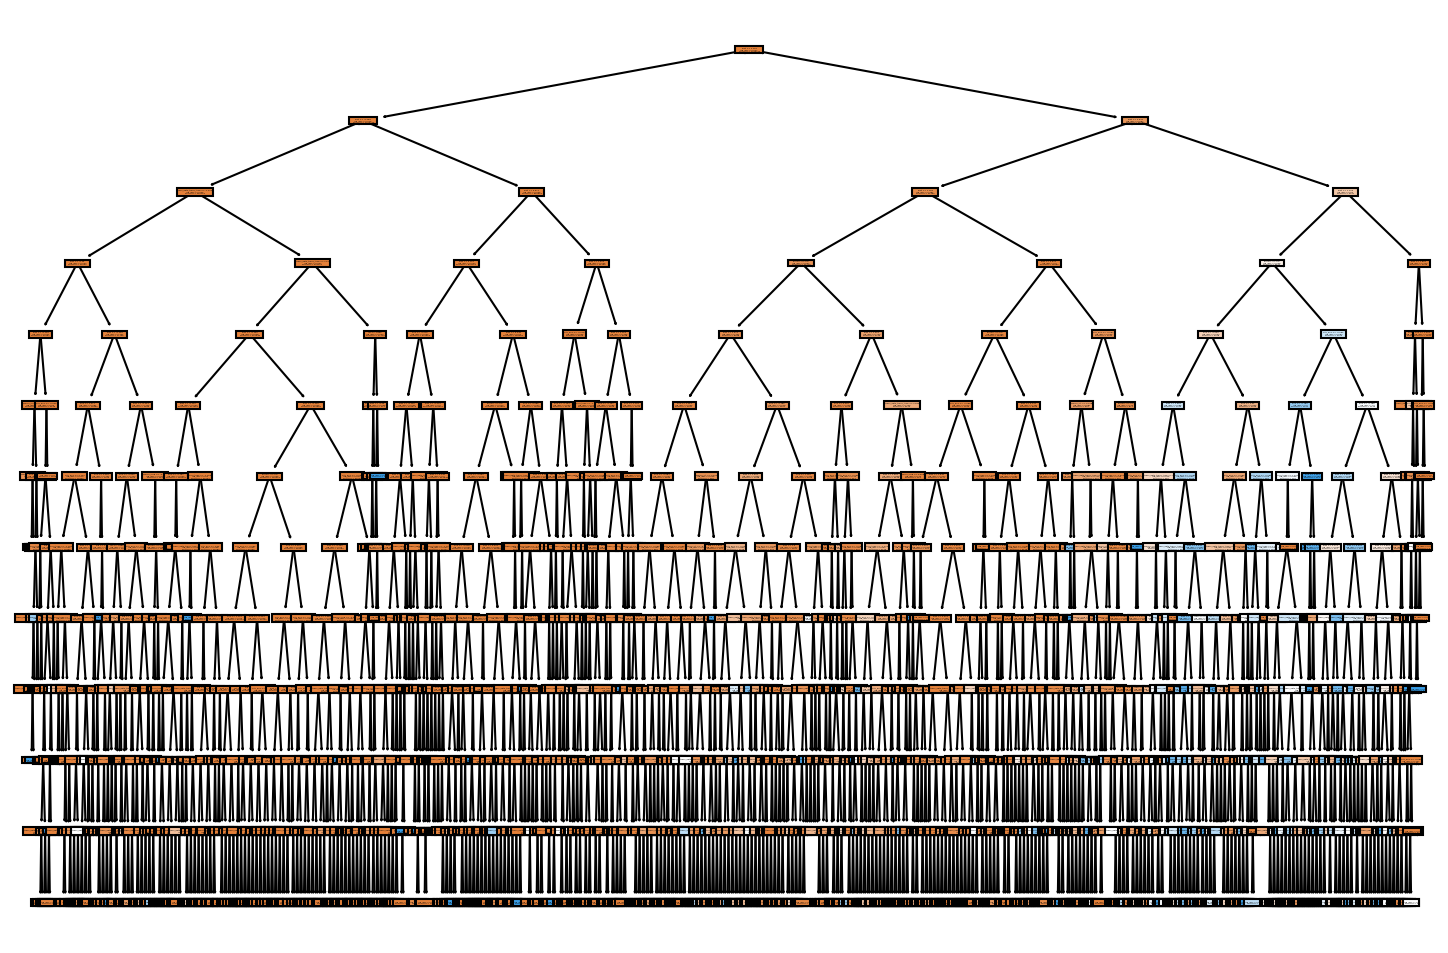

In [49]:
# Plotting the tree with classification report 
report_model(spec_tree_model)

The log_loss criterion in a decision tree classifier is a measure of how well the model predicts probabilities for each class, in our case, fraudulent and non-fraudulent transactions. Instrastingly, the model, with reduced amount of leaves was able to score 0.65 with only 0.05 differnce from the default model.

In [50]:
# Calculating the weight ratio between fruadulent and non-fraudulent transactions
    # ? By setting the appropriate weight ratio, you are telling the classifier to give more importance to the minority class during the training process. 
weight_ratio = fraud_df['is_fraud'].loc[fraud_df['is_fraud']==0].count() / fraud_df['is_fraud'].loc[fraud_df['is_fraud']==1].count()

In [51]:
# Defining the parameters to be evaluated in the model
tree_para = {'criterion':['gini','entropy', 'log_loss'],
             'max_depth':[7,8,9,10,11,12],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [8000,10000,15000,25000, 30000],
             'class_weight': [{0: 1, 1: weight_ratio}]}

# Define the scorer based on recall score
    # ? Focusing the model on recall score
scorer = make_scorer(recall_score)

# Initialize your DecisionTreeClassifier with desired parameters
model = DecisionTreeClassifier()

# Runing a grid search to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=tree_para, n_jobs=8, scoring=scorer, cv=10)
grid_search.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'class_weight': [{0: 1, 1: 190.93803750906642}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [8000, 10000, 15000, 25000,
                                               30000]},
             scoring=make_scorer(recall_score))

In [73]:
# Printing the optimal params
optimal_params = grid_search.best_params_
optimal_params

{'class_weight': {0: 1, 1: 190.93803750906642},
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 8000}

In [74]:
# Instantiating the model with the optimal parameters
tree_class = DecisionTreeClassifier(class_weight= {0: 1, 1: 190.93803750906642},
                                    criterion='log_loss',
                                    max_depth=12,
                                    max_features='auto',
                                    min_samples_split=8000)

In [75]:
# Fitting the model
tree_class.fit(X_train, y_train)

# predictions optimal model
tree_pred = tree_class.predict(X_test)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


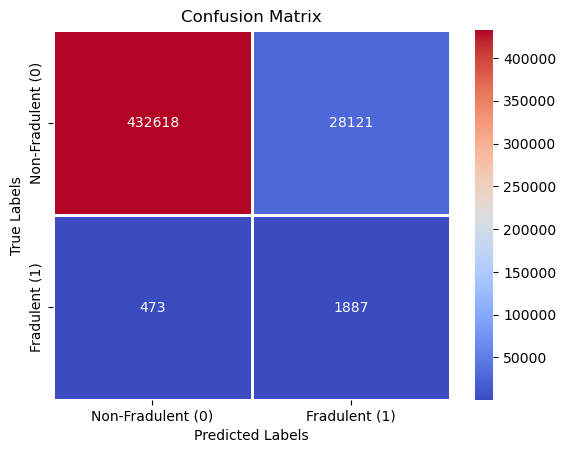

In [76]:
# Creating confusion metrix
tree_cx = confusion_matrix(y_test, tree_pred)

# Plot the confusion matrix
confusionM_plot(tree_cx)

               precision    recall  f1-score   support

Non-Fradulent       1.00      0.94      0.97    460739
    Fradulent       0.06      0.80      0.12      2360

     accuracy                           0.94    463099
    macro avg       0.53      0.87      0.54    463099
 weighted avg       0.99      0.94      0.96    463099





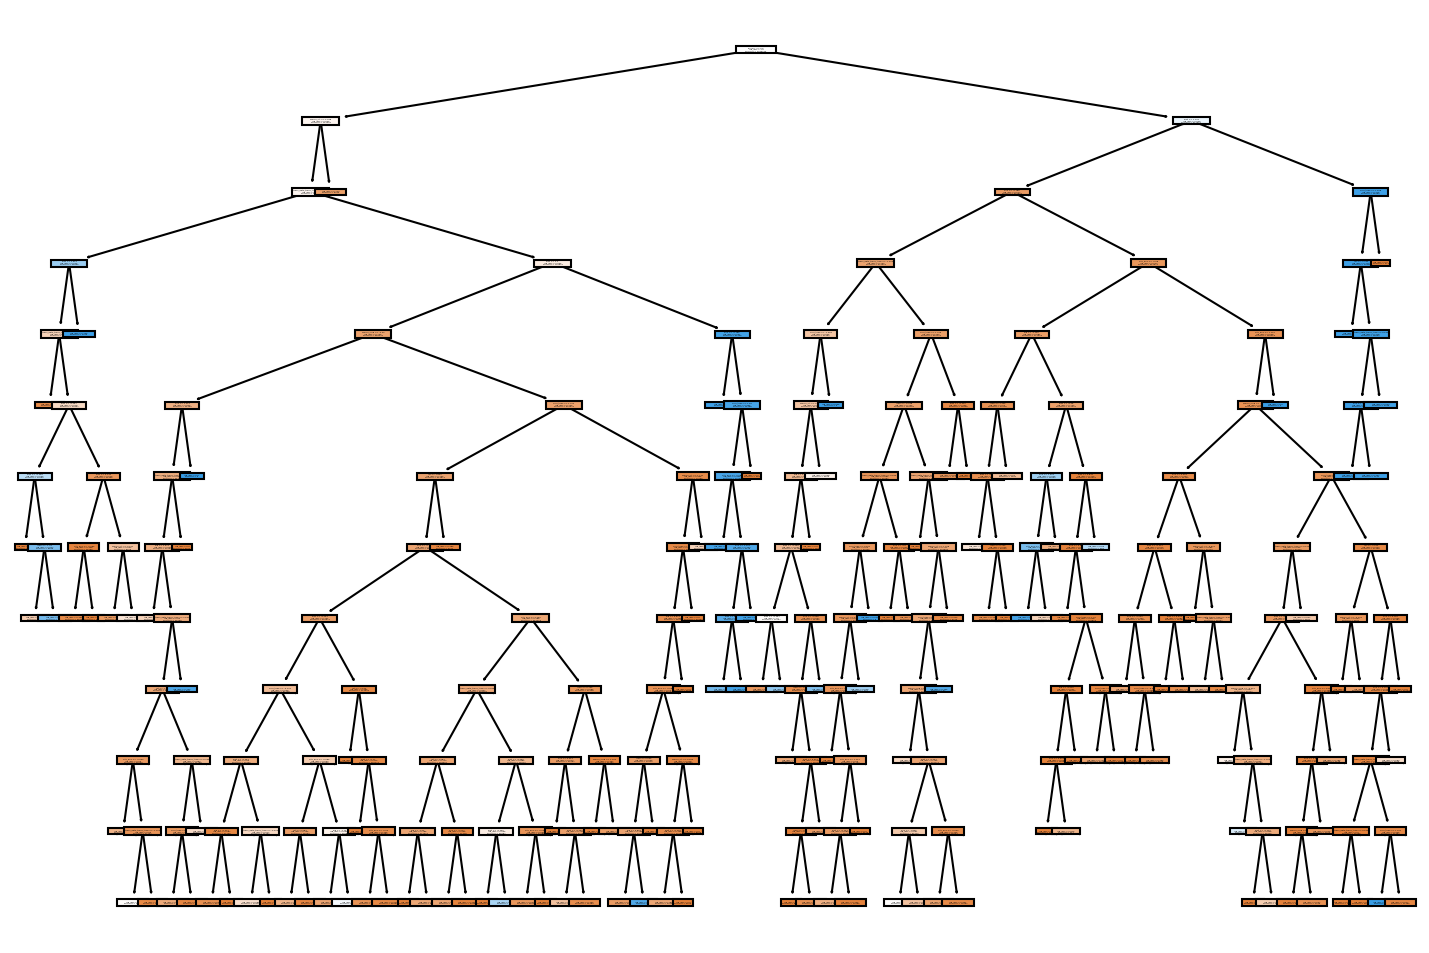

In [77]:
# Plotting the tree & printing the classification report
report_model(tree_class)

In [78]:
# Pickeling the model
# pickle.dump(tree_class, open('model.pkl','wb'))

In [79]:
# pickled_model = pickle.load(open('model.pkl', 'rb'))

In [80]:
# Creating the balanced dataset
balanced_df = X_train.copy()
balanced_df['is_fraud'] = y_train

In [81]:
# Extracting the fradulent transactions 
fradulent_df = balanced_df.loc[balanced_df['is_fraud']==1]

In [82]:
# Extracting the non-fradulent transactions 
non_fradulent_df = balanced_df.loc[balanced_df['is_fraud']==0].iloc[:10000]

In [83]:
# Appending the results to create a balanced dataset
balanced_train = pd.concat([fradulent_df, non_fradulent_df])

In [84]:
balanced_train = balanced_train.sample(frac=1)
balanced_train

,trans_date_trans_time,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,gender,is_fraud
928462,-1.010036,6.713093,-0.169194,0.487352,0.649564,-0.293852,-0.758214,-1.009286,0.361199,0.700539,0,1
282223,1.223301,-0.124038,-1.314243,0.850895,1.059605,-0.293437,-0.563133,1.222905,0.910380,1.027525,1,1
838778,-1.166903,-0.352918,1.421843,-0.700075,-1.151672,-0.269914,0.850574,-1.166406,-0.548942,-1.098819,1,0
1079545,-0.759021,-0.396747,-0.877926,-0.006332,0.606481,-0.275738,0.369952,-0.757866,-0.013828,0.622708,1,0
347923,1.359314,-0.050885,-0.315353,-0.168297,0.454007,-0.250699,-0.823345,1.359137,-0.008050,0.394807,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
490972,1.572950,-0.406103,-0.886482,-0.189119,0.705783,-0.285918,-1.838710,1.573117,-0.011144,0.638780,1,0
473050,1.555213,-0.374895,-0.333804,-1.334665,0.395278,-0.275029,-1.503926,1.555352,-1.373350,0.381018,0,0
67545,0.832322,-0.380798,0.029750,1.179912,0.292534,-0.291766,-0.391808,0.831295,1.320979,0.352275,1,0
760290,-1.332249,-0.402399,1.513987,0.198954,-2.150720,0.624412,1.344884,-1.332019,0.040564,-2.147008,1,0


In [85]:
# Creating variables and target variable
X_balanced = balanced_train.drop("is_fraud", axis=1)
y_balanced = balanced_train['is_fraud'].values.reshape(-1, 1)

In [86]:
# Recalculating the wight proportion between fraudulent and non-fraudulent transactions
balanced_wieght = balanced_train['is_fraud'].loc[balanced_train['is_fraud']==0].count() / balanced_train['is_fraud'].loc[balanced_train['is_fraud']==1].count()
balanced_wieght

1.371553970648745

In [87]:
# Defining the parameters to be evaluated in the model
tree_para = {'criterion':['gini', 'log_loss'],
             'max_depth':[4,5,6],
             'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight': [{0: 1, 1: balanced_wieght}]}

# Initialize your DecisionTreeClassifier with desired parameters
model = DecisionTreeClassifier()

# Runing a grid search to find the best parameters
balanced_grid = GridSearchCV(estimator=model, param_grid=tree_para, n_jobs=40, cv=10)
balanced_grid.fit(X_balanced, y_balanced)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=40,
             param_grid={'class_weight': [{0: 1, 1: 1.371553970648745}],
                         'criterion': ['gini', 'log_loss'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [88]:
# Printing the optimal params
optimal_balanced = balanced_grid.best_params_
optimal_balanced

{'class_weight': {0: 1, 1: 1.371553970648745},
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'auto'}

In [89]:
# Implementing the model with the optimal results
tree_balanced = DecisionTreeClassifier(class_weight= {0: 1, 1: 1.371553970648745},
                                    criterion='log_loss',
                                    max_depth=6,
                                    max_features='auto'
                                    )

In [90]:
# predicting the results
tree_balanced.fit(X_balanced, y_balanced)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(class_weight={0: 1, 1: 1.371553970648745},
                       criterion='log_loss', max_depth=6, max_features='auto')

In [91]:
# Predicting based on the X_test results
balanced_pred = tree_balanced.predict(X_test)

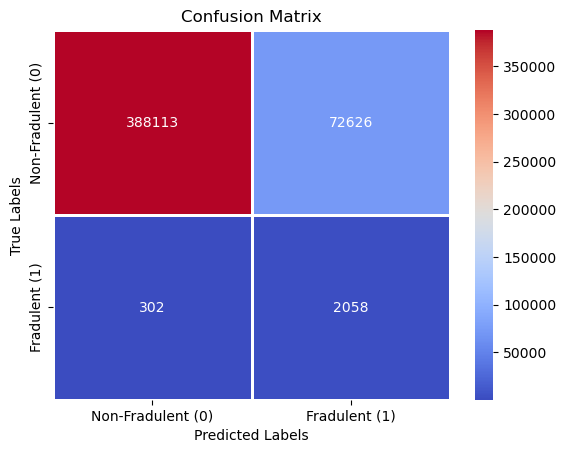

In [92]:
# Creating confusion metrix
balanced_cx = confusion_matrix(y_test, balanced_pred)

# Plot the confusion matrix
confusionM_plot(balanced_cx)

In [93]:
print(classification_report(y_test, balanced_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    460739
           1       0.03      0.87      0.05      2360

    accuracy                           0.84    463099
   macro avg       0.51      0.86      0.48    463099
weighted avg       0.99      0.84      0.91    463099

